<a href="https://colab.research.google.com/github/vuminhduc11/web/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feature_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.offline as pyoff
import plotly.graph_objs as go

import datetime as dt
import feature_engine

from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Data Cleaning - Làm sạch dữ liệu

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

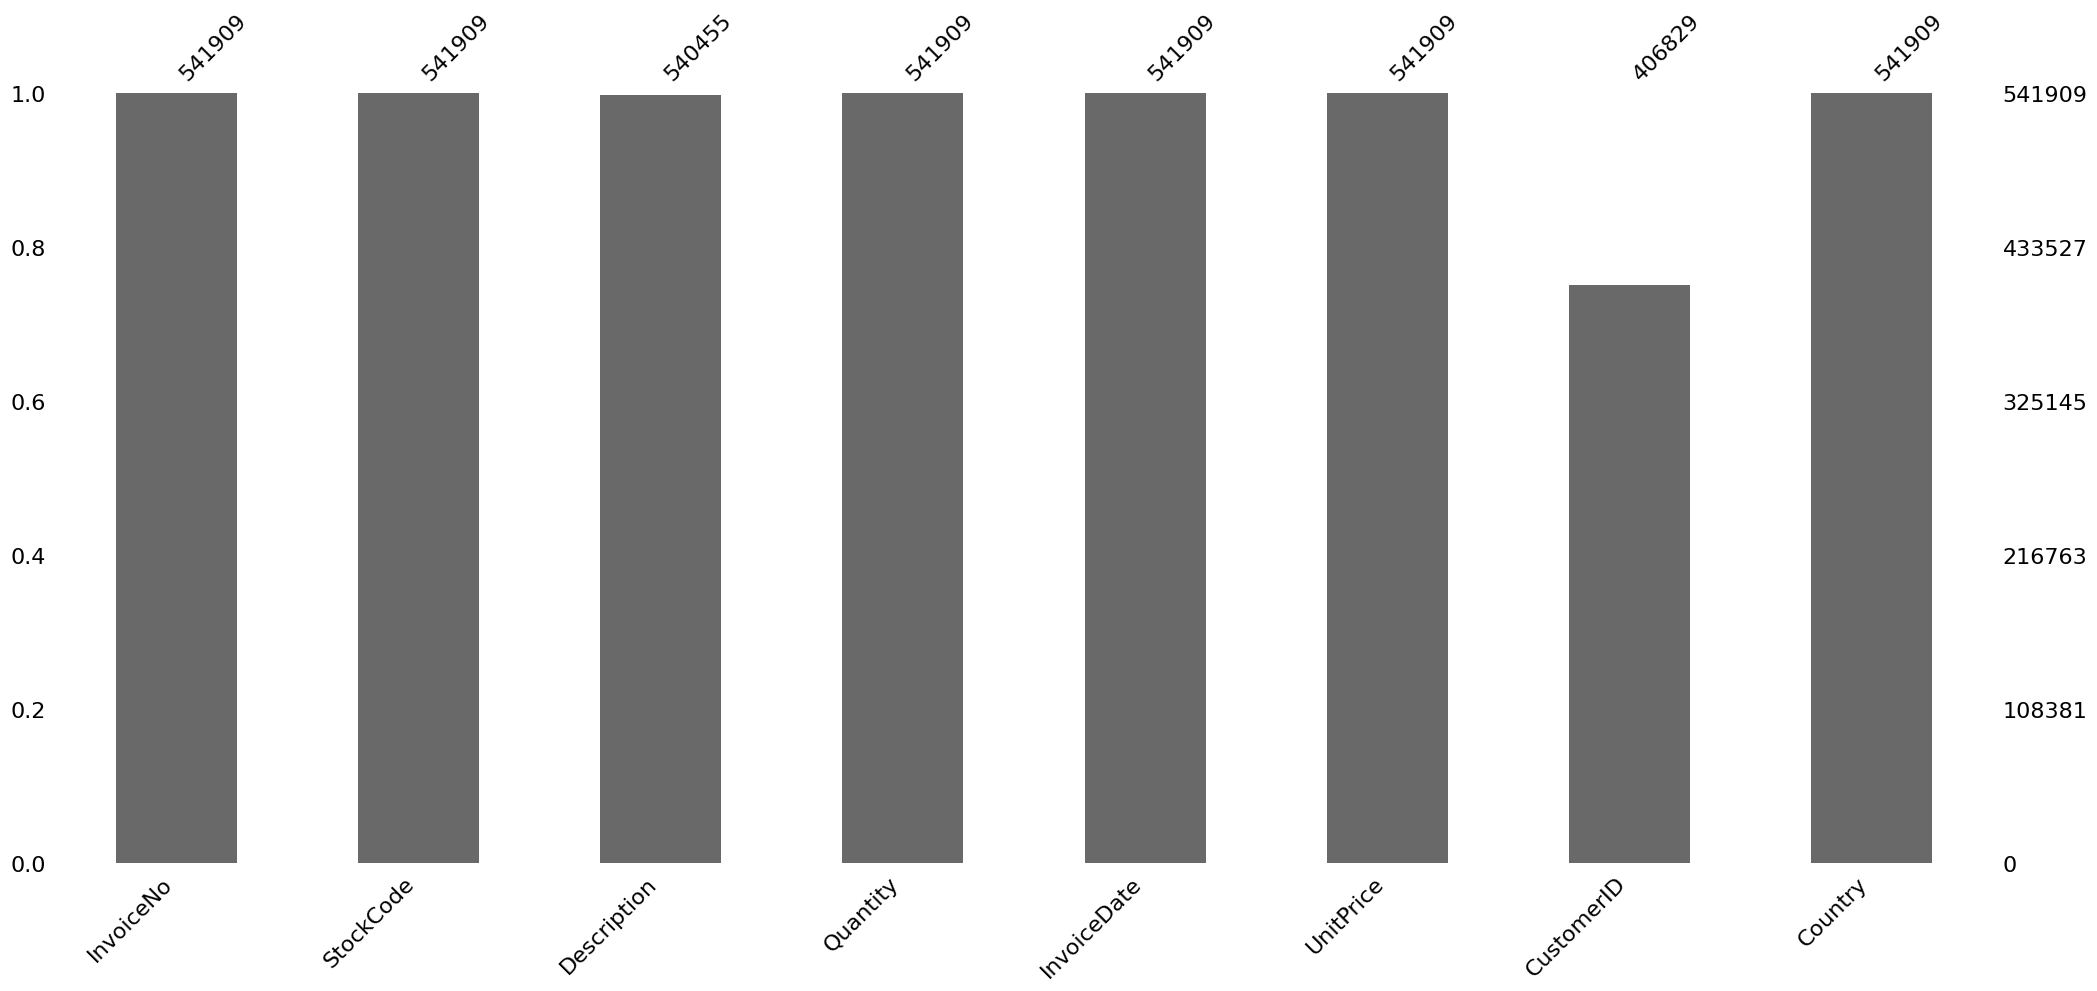

In [8]:
import missingno as msno
msno.bar(df)

Dropping null rows - xóa các hàng có giá tị null


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

<Axes: >

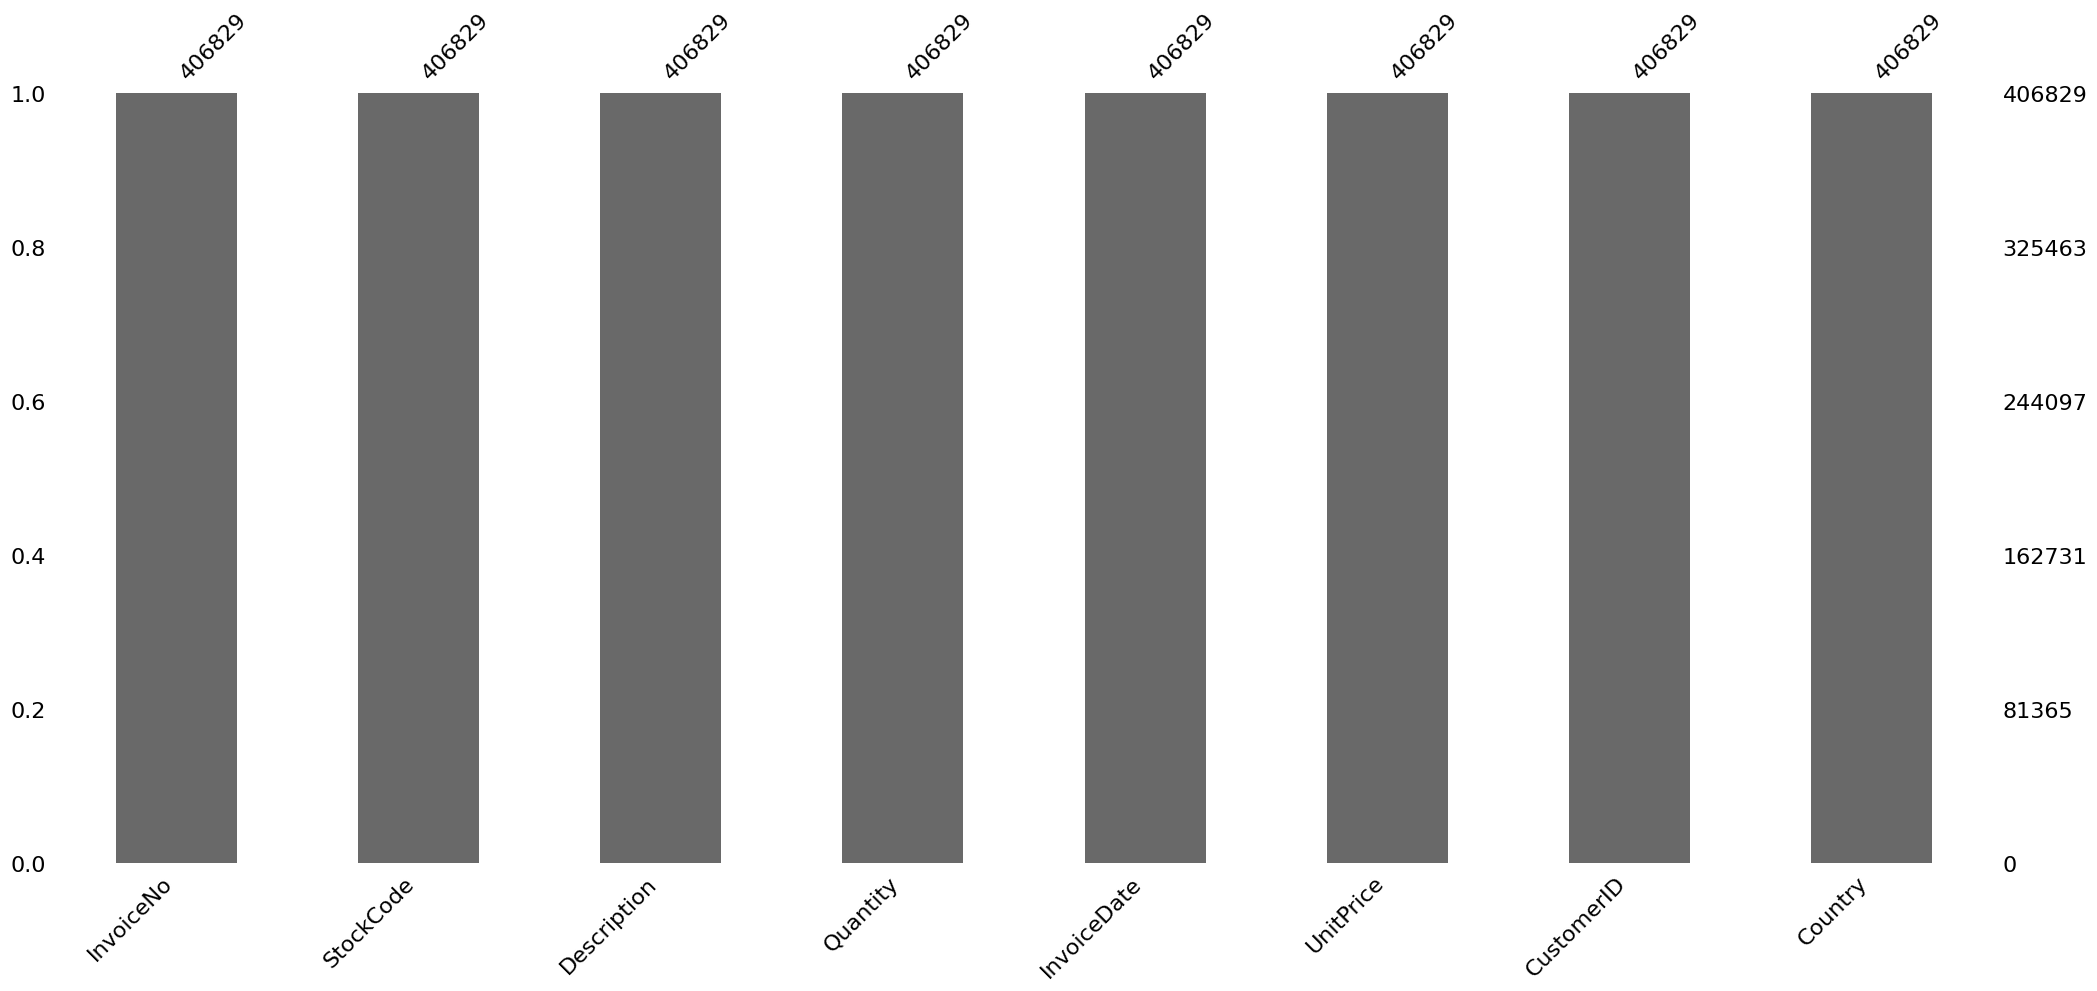

In [11]:
msno.bar(df)

Verify Quantity must be greater than zero - Xác nhận giá trị cột Quantity lớn hơn 0

In [12]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Dropping Rows in which Quantity <= 0 - Xóa hàng có Quantity <=0

In [13]:
df.drop(df[df['Quantity'] <= 0].index, inplace = True)

In [14]:
df.shape

(397924, 8)

Dropping Rows in which UnitPrice <=0 - Xóa cột có giá trị UnitPrice <=0

In [15]:
df.drop(df[df['UnitPrice'] <= 0].index, inplace = True)

In [16]:
df.shape

(397884, 8)

Check the CustomerID length - Kiểm tra độ dài CustomerID

In [17]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [18]:
df['CustomerID'].dtype

dtype('O')

In [19]:
for i in df['CustomerID']:
  if len(i) != 5:
    print(i)

In [20]:
print("CustomerID is ok")

CustomerID is ok


Checking Duplicates - Kiểm tra lặp

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [22]:
duplicate = df[df.duplicated('InvoiceNo')]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


Cột InvoiceNo có các giá trị giống nhau nhưng với các giá trị đó lại khác nhau về StockCode. Vì vậy chúng không được xem như là các giá trị lặp.

Verify Invoice Number - Xác nhận số lượng Invoice

In [23]:
df['InvoiceNo'].count()

397884

In [24]:
df['InvoiceNo'].dtypes

dtype('O')

Tất cả các giá trị cột InvoiceNo bắt đầu bằng 'C' đã được xóa truong khi xóa cột UnitPrice và Quantity <= 0

Phân tích dữ liệu thống kê

In [25]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,397884.000000,397884,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,179.331775,NaN,22.097877


In [26]:
df[df.Quantity == df.Quantity.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [27]:
df[df.Quantity == df.Quantity.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom
...,...,...,...,...,...,...,...,...
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,2011-12-09 12:20:00,1.95,12748,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748,United Kingdom


In [28]:
df[df.UnitPrice == df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [29]:
df[df.UnitPrice == df.UnitPrice.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom


In [30]:
df[df.Country == 'United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


In [31]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [32]:
df['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [33]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3877, dtype: int64

Getting the highest Quantity Countrywise - Lấy giá trị Quanity lớn nhất tương ứng từng quốc gia

In [34]:
gb = df.groupby('Country').Quantity.max()

In [35]:
gb

Country
Australia                1152
Austria                   288
Bahrain                    96
Belgium                   272
Brazil                     24
Canada                    504
Channel Islands           407
Cyprus                    288
Czech Republic             72
Denmark                   256
EIRE                     1440
European Community         24
Finland                   144
France                    912
Germany                   600
Greece                     48
Iceland                   240
Israel                    100
Italy                     200
Japan                    2040
Lebanon                    24
Lithuania                  48
Malta                      48
Netherlands              2400
Norway                    240
Poland                     72
Portugal                  120
RSA                        12
Saudi Arabia               12
Singapore                 288
Spain                     360
Sweden                    768
Switzerland               288
US

Visualization of Various Atribbutes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [37]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [38]:
df['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [39]:
numerical_variables = [feature for feature in df.columns if (df[feature].dtypes != 'O' and df[feature].dtypes !='<M8[ns]')]
numerical_variables

['Quantity', 'UnitPrice']

Create new feature Year from InvoiceDate - Tạo cột mới Year từ cột InvoiceDate

In [40]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [41]:
df['YearOfSale'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011


Finding corrrelation

In [42]:
df_corr = df[numerical_variables].corr()

In [43]:
df_corr

,Quantity,UnitPrice
Quantity,1.000000,-0.004563
UnitPrice,-0.004563,1.000000


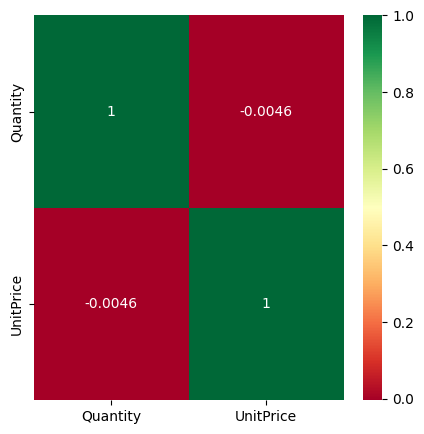

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
heat_map = sns.heatmap(df_corr,annot=True,cmap="RdYlGn",ax=ax)

Plots to get Statiscal Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   YearOfSale   397884 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 28.8+ MB


In [46]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,YearOfSale
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,2010.934260
min,1.000000,2010-12-01 08:26:00,0.001000,2010.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,2011.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,2011.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,2011.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,2011.000000
std,179.331775,NaN,22.097877,0.247828


Fetch Top 5 Countries Quantity wise Data

In [47]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5]

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

<Axes: xlabel='Country'>

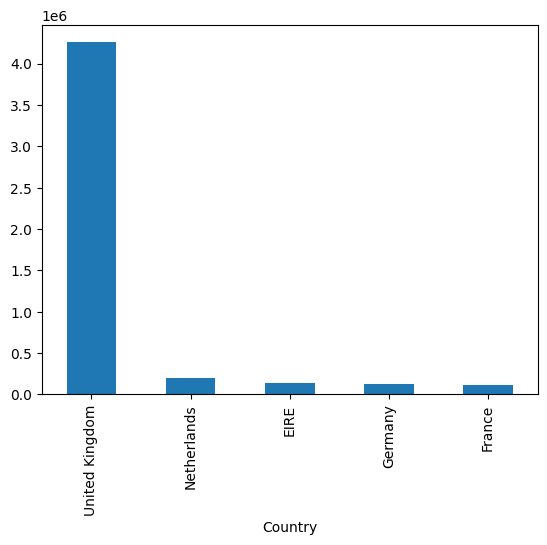

In [48]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

Quantity Sales of Year

In [49]:
df['YearOfSale'].unique()

array([2010, 2011], dtype=int32)

In [50]:
df.groupby(['YearOfSale'])['Quantity'].sum()

YearOfSale
2010     312265
2011    4855547
Name: Quantity, dtype: int64

<Axes: xlabel='YearOfSale'>

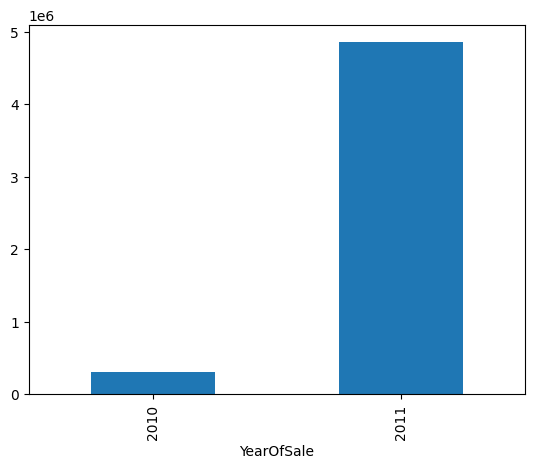

In [51]:
df.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar')

Total UnitPrice sold by year

<Axes: xlabel='YearOfSale'>

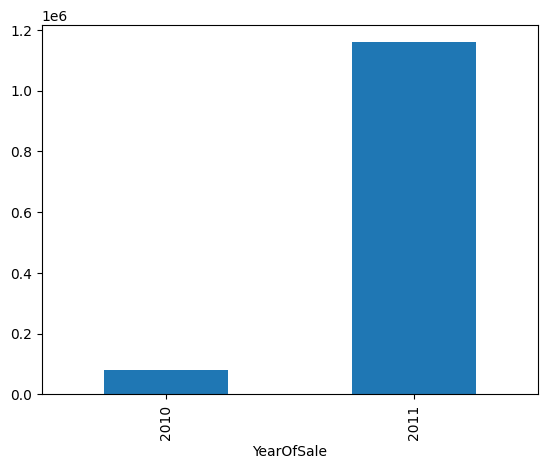

In [52]:
df.groupby(['YearOfSale'])['UnitPrice'].sum().plot(kind='bar')

Total Quantity sold by InvoiceNo [top10]

In [53]:
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10]

InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
572035    13392
567423    12572
552883    12266
563614    12196
562439    11848
548011    11116
Name: Quantity, dtype: int64

<Axes: xlabel='InvoiceNo'>

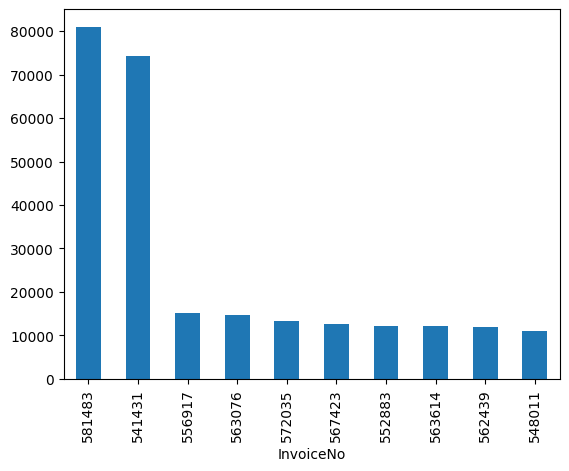

In [54]:
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

RFM Analysis

In [55]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [56]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397884, dtype: object

In [57]:
df[['Quantity', 'UnitPrice']]

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [58]:
df['Price'] = df['Quantity'] * df['UnitPrice']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   YearOfSale   397884 non-null  int32         
 9   Price        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 31.9+ MB


In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34


In [61]:
df.Country.nunique()

37

In [62]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [63]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [64]:
Now = dt.datetime(2011,12,10)

In [65]:
Now

datetime.datetime(2011, 12, 10, 0, 0)

In [66]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [67]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

Create RFM table

In [105]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [106]:
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [107]:
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [108]:
rfmTable.shape

(4338, 3)

Giải thích: Khách hàng có ID 12346 mua hàng duy nhất 1 lần với tổng tiền là 77183.60$ vào 325 ngày trước

In [109]:
df[df['CustomerID']=='12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011,77183.6


CHia số liệu thành các phân đoạn bằng cách sử dụng quantile. Chỉ định điểm từ 1-4 cho Recency, Frequency và Monetary tương ứng. 4 là giá trị cao nhất, 1 là thấp nhất. Giá trị RFM cuối cùng được tính đơn giản bằng cách hợp nhất 3 giá trị RFM

In [110]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [111]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [112]:
rfmTable['R_quartile'] = rfmTable['Recency'].apply(RScore, args=('Recency',quantiles))
rfmTable['F_quartile'] = rfmTable['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfmTable['M_quartile'] = rfmTable['Monetary_Value'].apply(FMScore, args=('Monetary_Value',quantiles))
rfmTable.head()

,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346,325,1,77183.60,1,1,4
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,18,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2


RFM_score = R_quartile + F_quartile + M_quartile

In [113]:
rfmTable['RFM_segment'] = rfmTable.R_quartile.map(str) + rfmTable.F_quartile.map(str) + rfmTable.M_quartile.map(str)

In [114]:
rfmTable.head()

,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [115]:
rfmTable.reset_index(inplace=True)

In [116]:
rfm_segment = rfmTable.groupby('RFM_segment')['RFM_segment']



print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('***********************************')
print(rfm_segment.unique())
print('***********************************')

The Number of Unique Segment is -  61
***********************************
RFM_segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_segment, Length: 61, dtype: object
***********************************


In [117]:
rfmTable['RFM_Score'] = rfmTable[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
rfmTable

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,2,182,4310.00,4,4,4,444,12
2,12348,75,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...,...
4333,18280,277,10,180.60,1,1,1,111,3
4334,18281,180,7,80.82,1,1,1,111,3
4335,18282,7,12,178.05,4,1,1,411,6
4336,18283,3,756,2094.88,4,4,4,444,12


In [118]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

rfmTable.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_Score,RFM_Level
0,12346,325,1,77183.60,1,1,4,114,6,Potential
1,12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them
2,12348,75,31,1797.24,2,2,4,224,8,Champions
3,12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them
4,12350,310,17,334.40,1,1,2,112,4,Needs Attention


In [119]:
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.2      13.7          239.0   385
Potential             95.6      28.0          823.8   464
Promising            153.3      21.4          368.7   517
Require Activation   260.4       8.2          159.3   385

Visualization RFM level

In [83]:
!pip install squarify

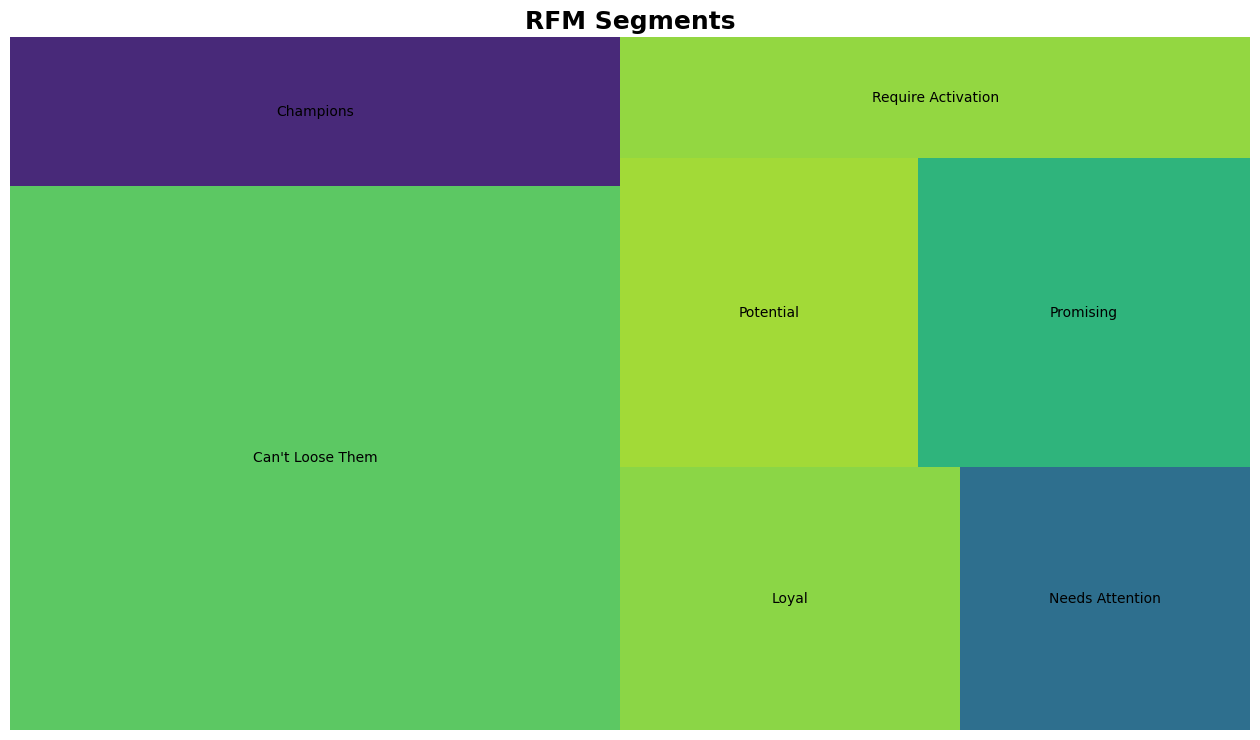

In [120]:
import squarify
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',
                     'Promising',
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Phân khúc bằng K-means

In [121]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.2453948317057284, : SkewtestResult(statistic=26.60351236555474, pvalue=6.181721752536432e-156)
Frequency's: Skew: 18.09990377360193, : SkewtestResult(statistic=83.56042637346283, pvalue=0.0)
Monetary_Value's: Skew: 19.31827038422537, : SkewtestResult(statistic=84.99544548748324, pvalue=0.0)


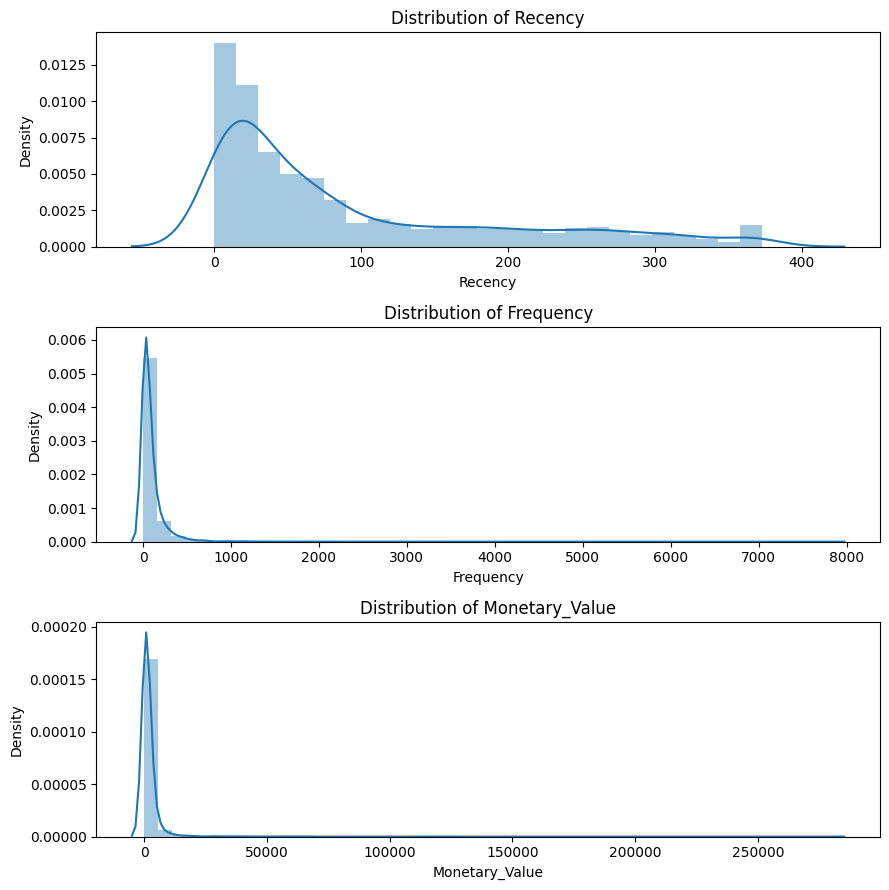

In [122]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfmTable,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfmTable,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfmTable,'Monetary_Value')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [123]:
rfmTable['CustomerID'] = rfmTable['CustomerID'].astype(float)

In [124]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4338 non-null   float64
 1   Recency         4338 non-null   int64  
 2   Frequency       4338 non-null   int64  
 3   Monetary_Value  4338 non-null   float64
 4   R_quartile      4338 non-null   int64  
 5   F_quartile      4338 non-null   int64  
 6   M_quartile      4338 non-null   int64  
 7   RFM_segment     4338 non-null   object 
 8   RFM_Score       4338 non-null   int64  
 9   RFM_Level       4338 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 339.0+ KB


In [125]:
df_rfm_log = rfmTable[['CustomerID','Recency','Frequency','Monetary_Value']]

Recency's: Skew: -0.4670749364137121, : SkewtestResult(statistic=-11.982131984493975, pvalue=4.408387035293672e-33)
Frequency's: Skew: -0.014039824144133517, : SkewtestResult(statistic=-0.37814349655585117, pvalue=0.7053239974885566)
Monetary_Value's: Skew: 0.3934164907708621, : SkewtestResult(statistic=10.226095784030395, pvalue=1.5150468096105785e-24)


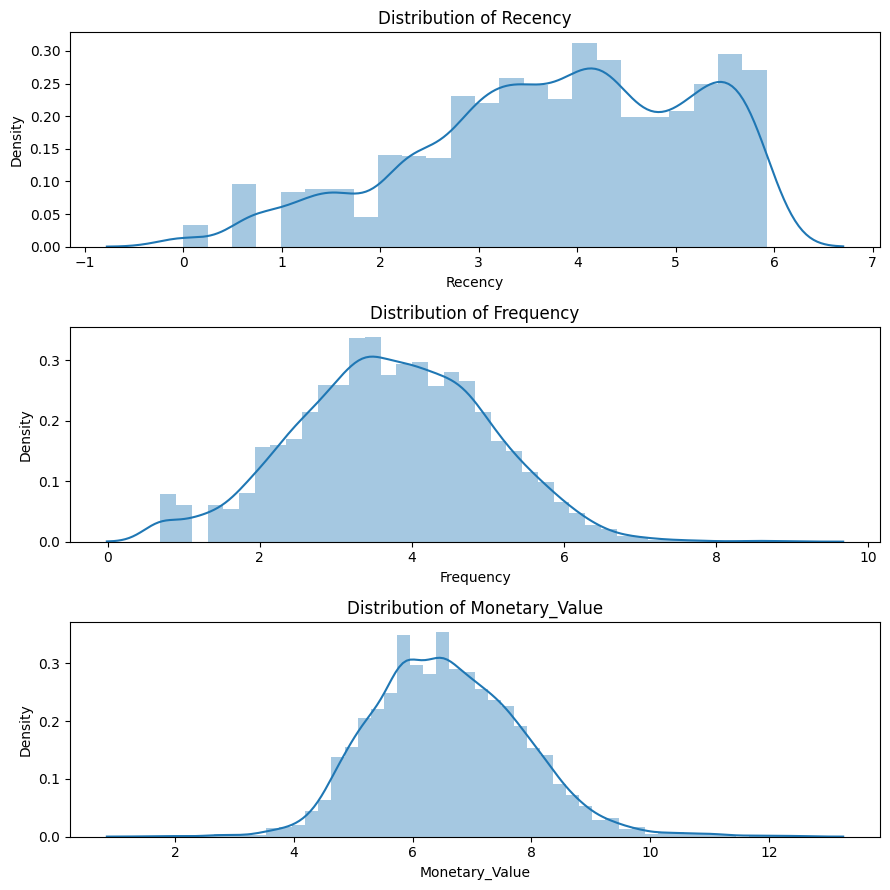

In [126]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary_Value')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [127]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary_Value']
                        )

windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both',
           variables=['Recency', 'Frequency', 'Monetary_Value'])

In [128]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [129]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

rfm_normalized = scaler.transform(df_rfm_log)

In [130]:
rfm_normalized = pd.DataFrame(rfm_normalized, columns=df_rfm_log.columns)

In [131]:
rfm_normalized.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,-1.833336,1.463308,-2.079371,2.146245
1,-1.832623,-2.020188,1.222492,1.519009
2,-1.831909,0.381347,-0.226632,0.777453
3,-1.831196,-0.648699,0.470052,0.758524
4,-1.830483,1.428309,-0.704782,-0.646729


Elbow method

In [132]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)
inertia

[17351.999999999985,
 10872.29877733127,
 9139.27231541979,
 7575.178995913945,
 6672.465565339319,
 6053.545387768043,
 5501.655839812336]

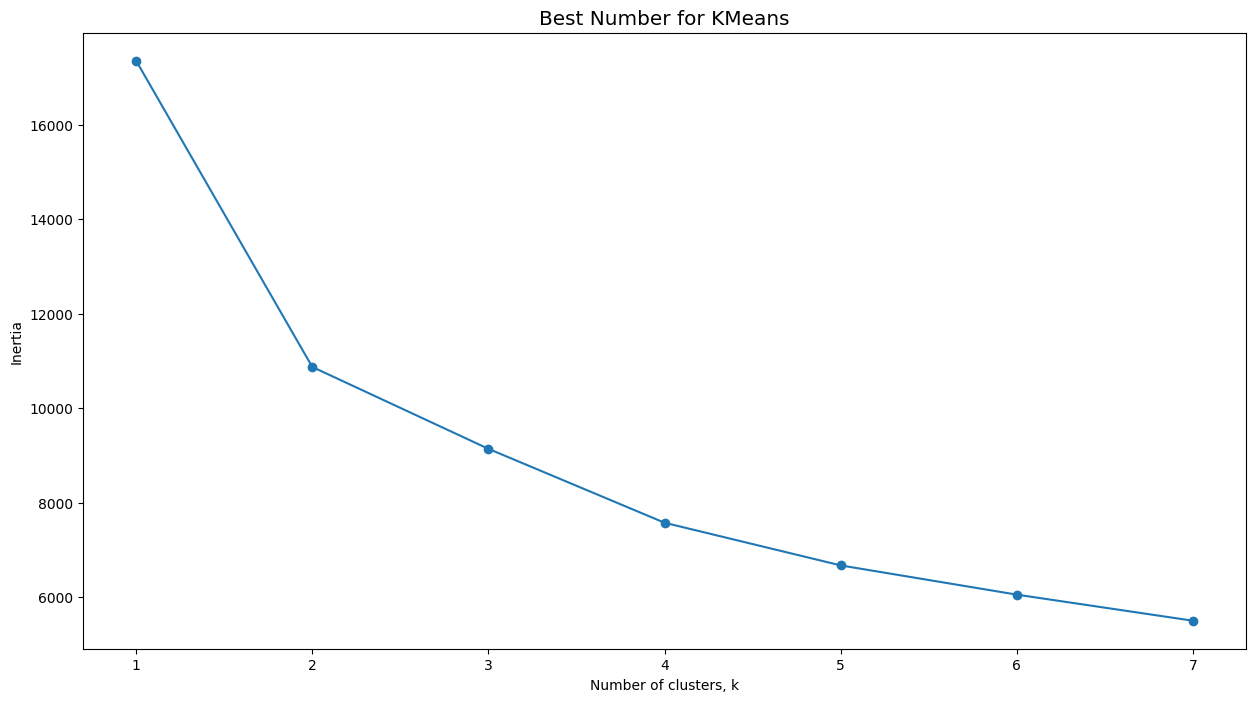

In [133]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

silhouette

In [134]:
from sklearn.metrics import silhouette_samples, silhouette_score
# find the optimum number of clusters (k) using the Silhouette method
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(rfm_normalized)
    clusters = kmeans.predict(rfm_normalized)
    silhouette_avg = silhouette_score(rfm_normalized, clusters)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.31409984011113873
For n_clusters = 3 The average silhouette_score is : 0.2634275968881685
For n_clusters = 4 The average silhouette_score is : 0.24446245345826967
For n_clusters = 5 The average silhouette_score is : 0.23351307591994724
For n_clusters = 6 The average silhouette_score is : 0.23879625423644596
For n_clusters = 7 The average silhouette_score is : 0.22629159654650552


K = 3 la toi uu nhat

In [135]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=1)

In [136]:
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_Score,RFM_Level,K_Cluster
0,12346.0,325,1,77183.60,1,1,4,114,6,Potential,2
1,12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them,2
2,12348.0,75,31,1797.24,2,2,4,224,8,Champions,2
3,12349.0,18,73,1757.55,3,3,4,334,10,Can't Loose Them,2
4,12350.0,310,17,334.40,1,1,2,112,4,Needs Attention,0


In [137]:
rfmTable.tail()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_Score,RFM_Level,K_Cluster
4333,18280.0,277,10,180.60,1,1,1,111,3,Require Activation,0
4334,18281.0,180,7,80.82,1,1,1,111,3,Require Activation,0
4335,18282.0,7,12,178.05,4,1,1,411,6,Potential,0
4336,18283.0,3,756,2094.88,4,4,4,444,12,Can't Loose Them,1
4337,18287.0,42,70,1837.28,3,3,4,334,10,Can't Loose Them,1


In [138]:
rfmTable111 = rfmTable[['RFM_Level','K_Cluster']]
rfmTable111.head()

,RFM_Level,K_Cluster
0,Potential,2
1,Can't Loose Them,2
2,Champions,2
3,Can't Loose Them,2
4,Needs Attention,0


Visualization

In [140]:
a = rfmTable111[rfmTable111['K_Cluster']==0]

In [141]:
a.nunique()

RFM_Level    7
K_Cluster    1
dtype: int64

Text(0.5, 0.92, 'R,F,M Scores vs K-Means Clusters')

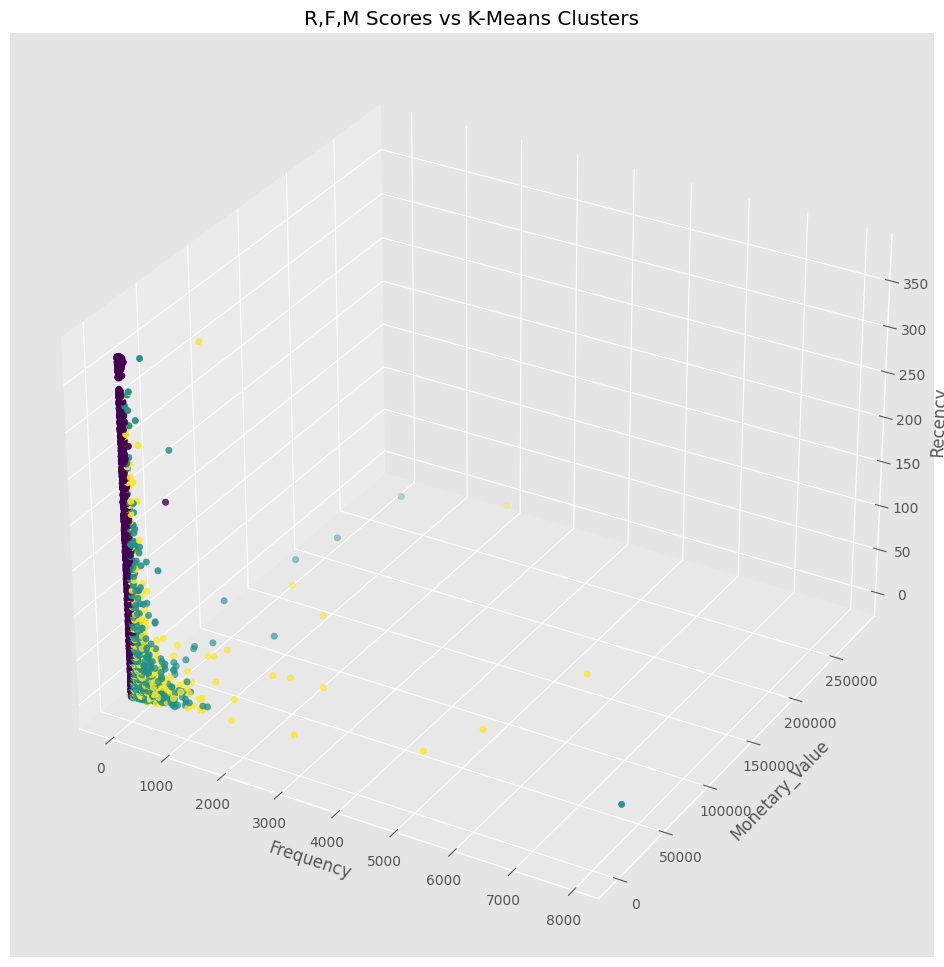

In [142]:
# 3D scatter plot of R, F & M values with the 4 K_Clusters
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfmTable["Frequency"], rfmTable["Monetary_Value"], rfmTable["Recency"], c = rfmTable["K_Cluster"])
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary_Value")
ax.set_zlabel("Recency")
ax.set_title("R,F,M Scores vs K-Means Clusters")

In [143]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

In [144]:
rfmTable.reset_index(inplace = True)
rfmTable.head()

,index,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_Score,RFM_Level,K_Cluster
0,0,12346.0,325,1,77183.60,1,1,4,114,6,Potential,2
1,1,12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them,2
2,2,12348.0,75,31,1797.24,2,2,4,224,8,Champions,2
3,3,12349.0,18,73,1757.55,3,3,4,334,10,Can't Loose Them,2
4,4,12350.0,310,17,334.40,1,1,2,112,4,Needs Attention,0


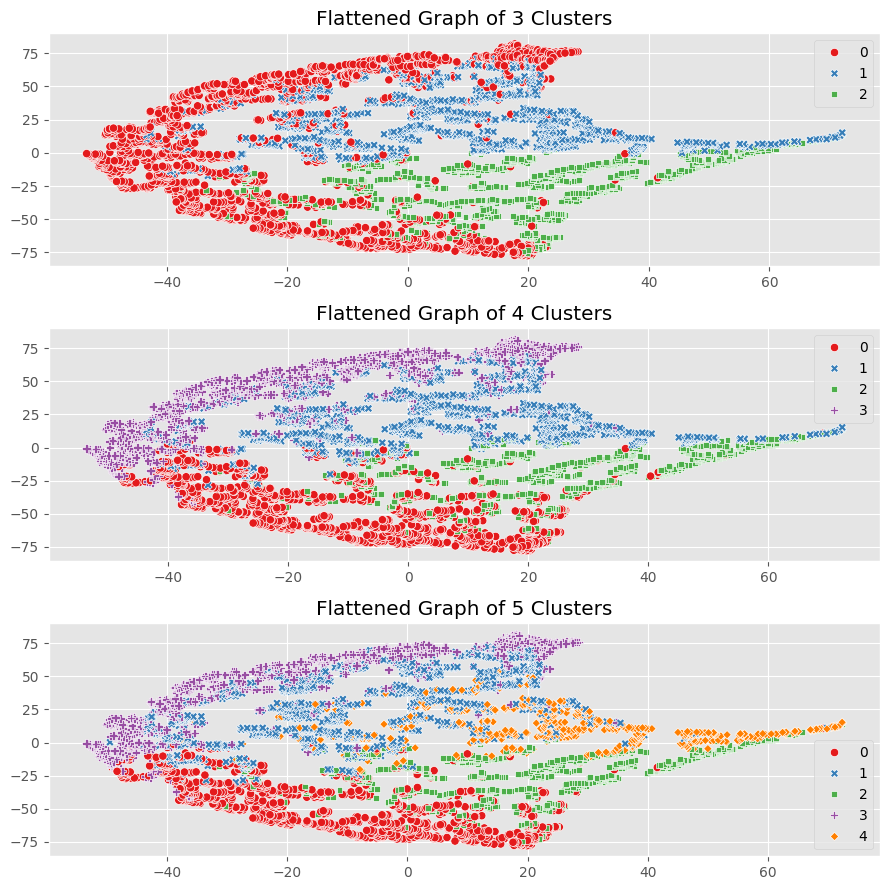

In [145]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(rfm_normalized, 3, rfmTable[['CustomerID','Recency','Frequency','Monetary_Value']])

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(rfm_normalized, 4, rfmTable[['CustomerID','Recency','Frequency','Monetary_Value']])

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(rfm_normalized, 5, rfmTable[['CustomerID','Recency','Frequency','Monetary_Value']])

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

Mô hình LRFMP


In [176]:
df2 = df.copy()

Tạo cột date_diff

In [177]:
df2['date_diff'] = df2.groupby('CustomerID')['InvoiceDate'].diff().dt.days

Tạo cột tổng lượng tiền

In [178]:
df2['Moneytary'] = df2.groupby('CustomerID')['Price'].transform('sum')

Tạo cột khoảng thời gian

In [179]:
df2['Length'] = df2['InvoiceDate']

xóa các giá trị date_diff bằng 0 là các lần mua trong ngày


In [180]:
df2.drop(df2[df2['date_diff'] == 0].index,inplace=True)

Tạo cột period

In [181]:
df2['Period'] = df2.groupby('CustomerID')['date_diff'].transform('std')

In [182]:
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price,date_diff,Moneytary,Length,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,15.30,NaN,5391.21,2010-12-01 08:26:00,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010,54.08,NaN,3237.54,2010-12-01 08:34:00,15.799337
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,2010,90.00,NaN,7281.38,2010-12-01 08:45:00,17.576208
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,2010,204.00,NaN,948.25,2010-12-01 09:00:00,67.987744
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,2010,350.40,NaN,876.00,2010-12-01 09:09:00,17.677670


Xóa các giá trị null của datediff và period

In [183]:
df2.dropna(inplace=True)

Tạo bảng LRFM


In [201]:
lrfmpTable = df2.groupby('CustomerID').agg({'Length' : lambda x :(x.max() - x.min()).days,
                                            'InvoiceDate' : lambda x :(Now - x.max()).days,
                                            'InvoiceNo' : lambda x :len(x),
                                            'Moneytary' : lambda x :max(x),
                                            'Period': lambda x: max(x)})

In [202]:
lrfmpTable.rename(columns ={'InvoiceDate' : 'Recency',
                            'InvoiceNo' :'Frequency'},inplace = True)

In [203]:
lrfmpTable

,Length,Recency,Frequency,Moneytary,Period
CustomerID,,,,,
12347,315,2,6,4310.00,18.478817
12348,243,75,3,1797.24,70.149840
12352,246,36,6,2506.04,68.419296
12356,222,22,2,2811.43,100.409163
12359,247,57,3,6372.58,56.929781
...,...,...,...,...,...
18263,129,25,2,1213.16,23.334524
18272,222,2,5,3078.58,21.993181
18273,93,2,2,204.00,48.790368


Giải thích: Khách hàng có mã 12348 có khoảng thời gian mua sắm là 243 ngày, lần gần nhất mua cách đây 75 ngày, với 3 lần mua sắm, tổng lượng tiền là 1797.24, với chu kì là 68.419296


In [204]:
lrfmpTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 12347 to 18287
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Length     1910 non-null   int64  
 1   Recency    1910 non-null   int64  
 2   Frequency  1910 non-null   int64  
 3   Moneytary  1910 non-null   float64
 4   Period     1910 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 89.5+ KB


In [205]:
df2[df2['CustomerID']=='12348']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price,date_diff,Moneytary,Length,Period
70051,541998,21980,PACK OF 12 RED RETROSPOT TISSUES,144,2011-01-25 10:42:00,0.29,12348,Finland,2011,41.76,39.0,1797.24,2011-01-25 10:42:00,70.14984
146013,548955,23077,DOUGHNUT LIP GLOSS,80,2011-04-05 10:47:00,1.25,12348,Finland,2011,100.00,70.0,1797.24,2011-04-05 10:47:00,70.14984
359058,568172,23077,DOUGHNUT LIP GLOSS,120,2011-09-25 13:13:00,1.25,12348,Finland,2011,150.00,173.0,1797.24,2011-09-25 13:13:00,70.14984


In [206]:
lrfmpTable.isnull().sum()

Length       0
Recency      0
Frequency    0
Moneytary    0
Period       0
dtype: int64

In [207]:
lrfmpTable.reset_index(inplace=True)

In [208]:
lrfmpTable['CustomerID'] =lrfmpTable['CustomerID'].astype(float)

Chuẩn hóa dữ liệu


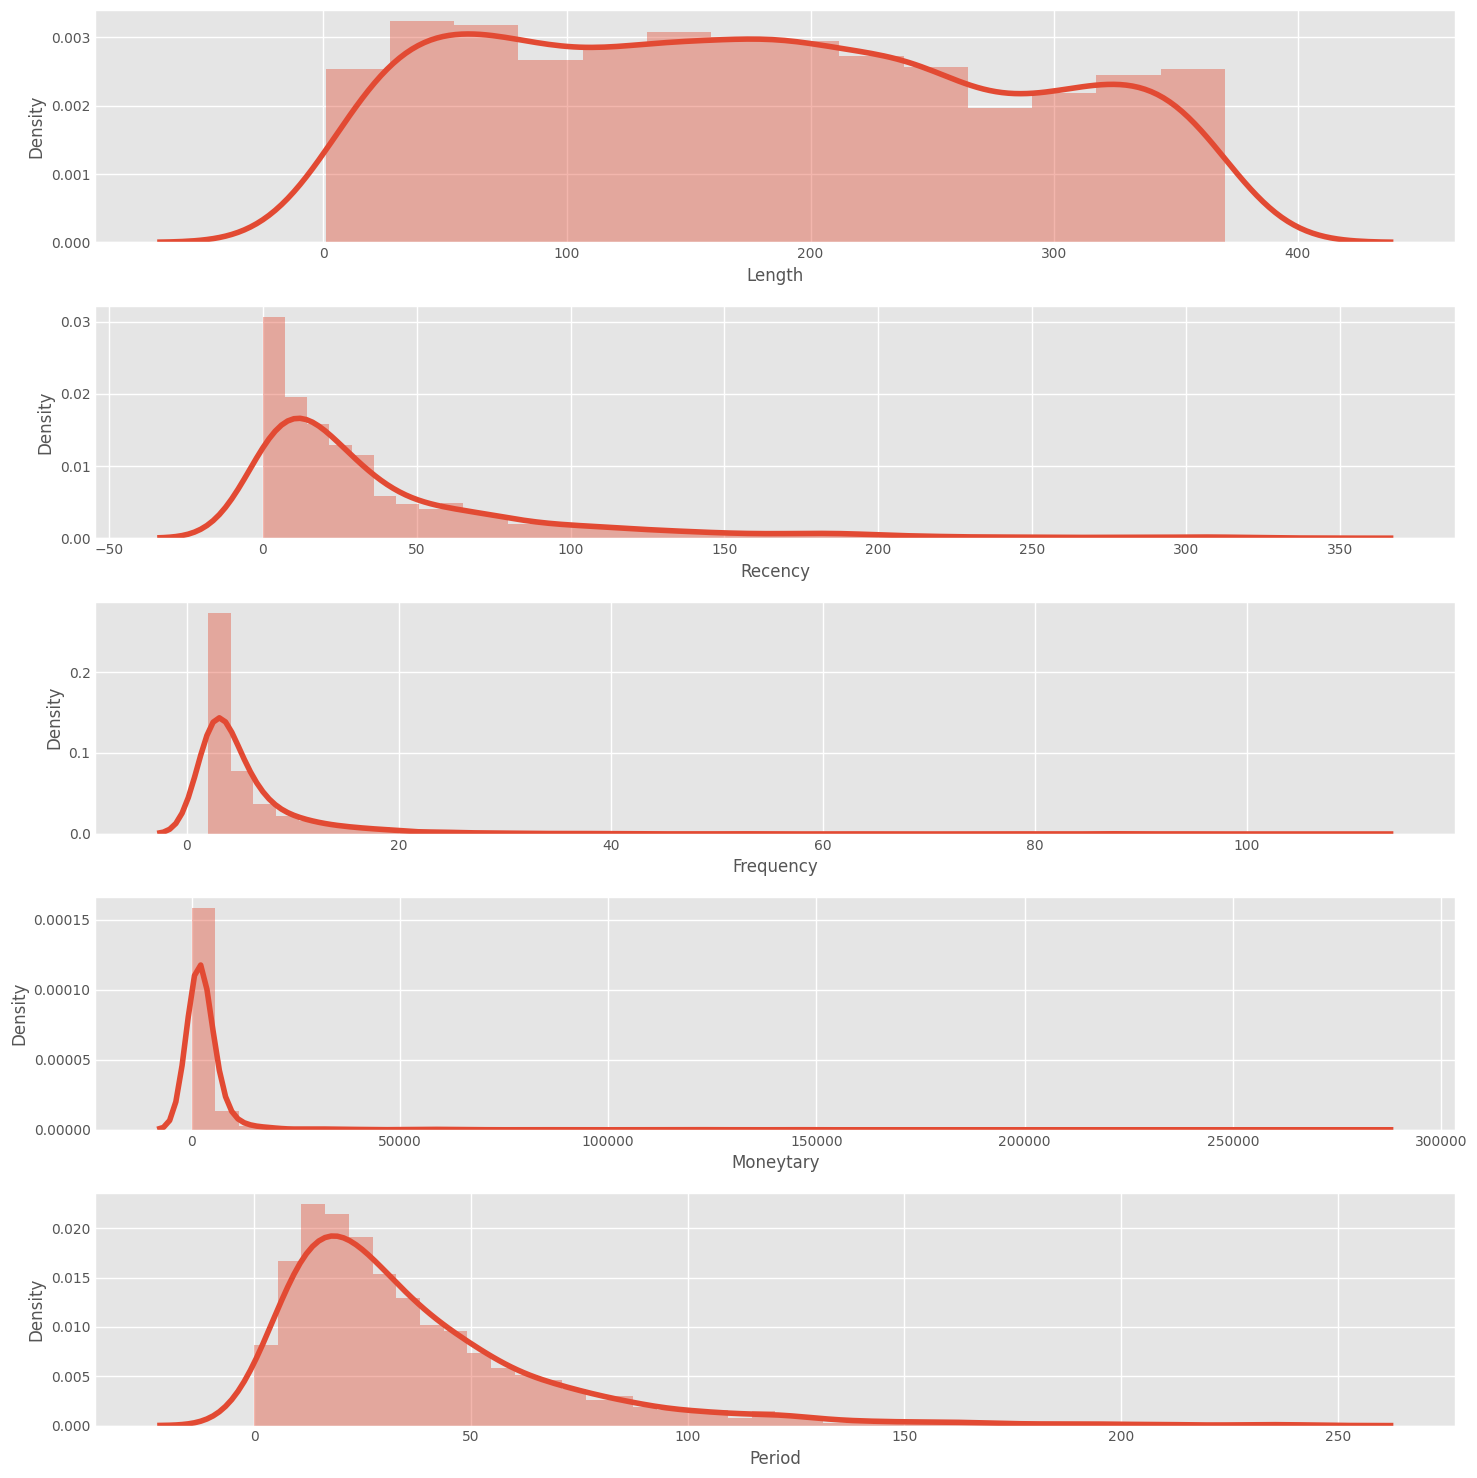

In [209]:
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(5, 1, 1); sns.distplot(lrfmpTable.Length, label = 'Length')
plt.subplot(5, 1, 2); sns.distplot(lrfmpTable.Recency, label = 'Recency')
plt.subplot(5, 1, 3); sns.distplot(lrfmpTable.Frequency, label = 'Frequency')
plt.subplot(5, 1, 4); sns.distplot(lrfmpTable.Moneytary, label = 'Monetary')
plt.subplot(5, 1, 5); sns.distplot(lrfmpTable.Period, label = 'Period')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [210]:
lrfmp_sqrt = lrfmpTable[['Length','Recency', 'Frequency', 'Moneytary','Period']].apply(np.sqrt, axis = 1).round(3)

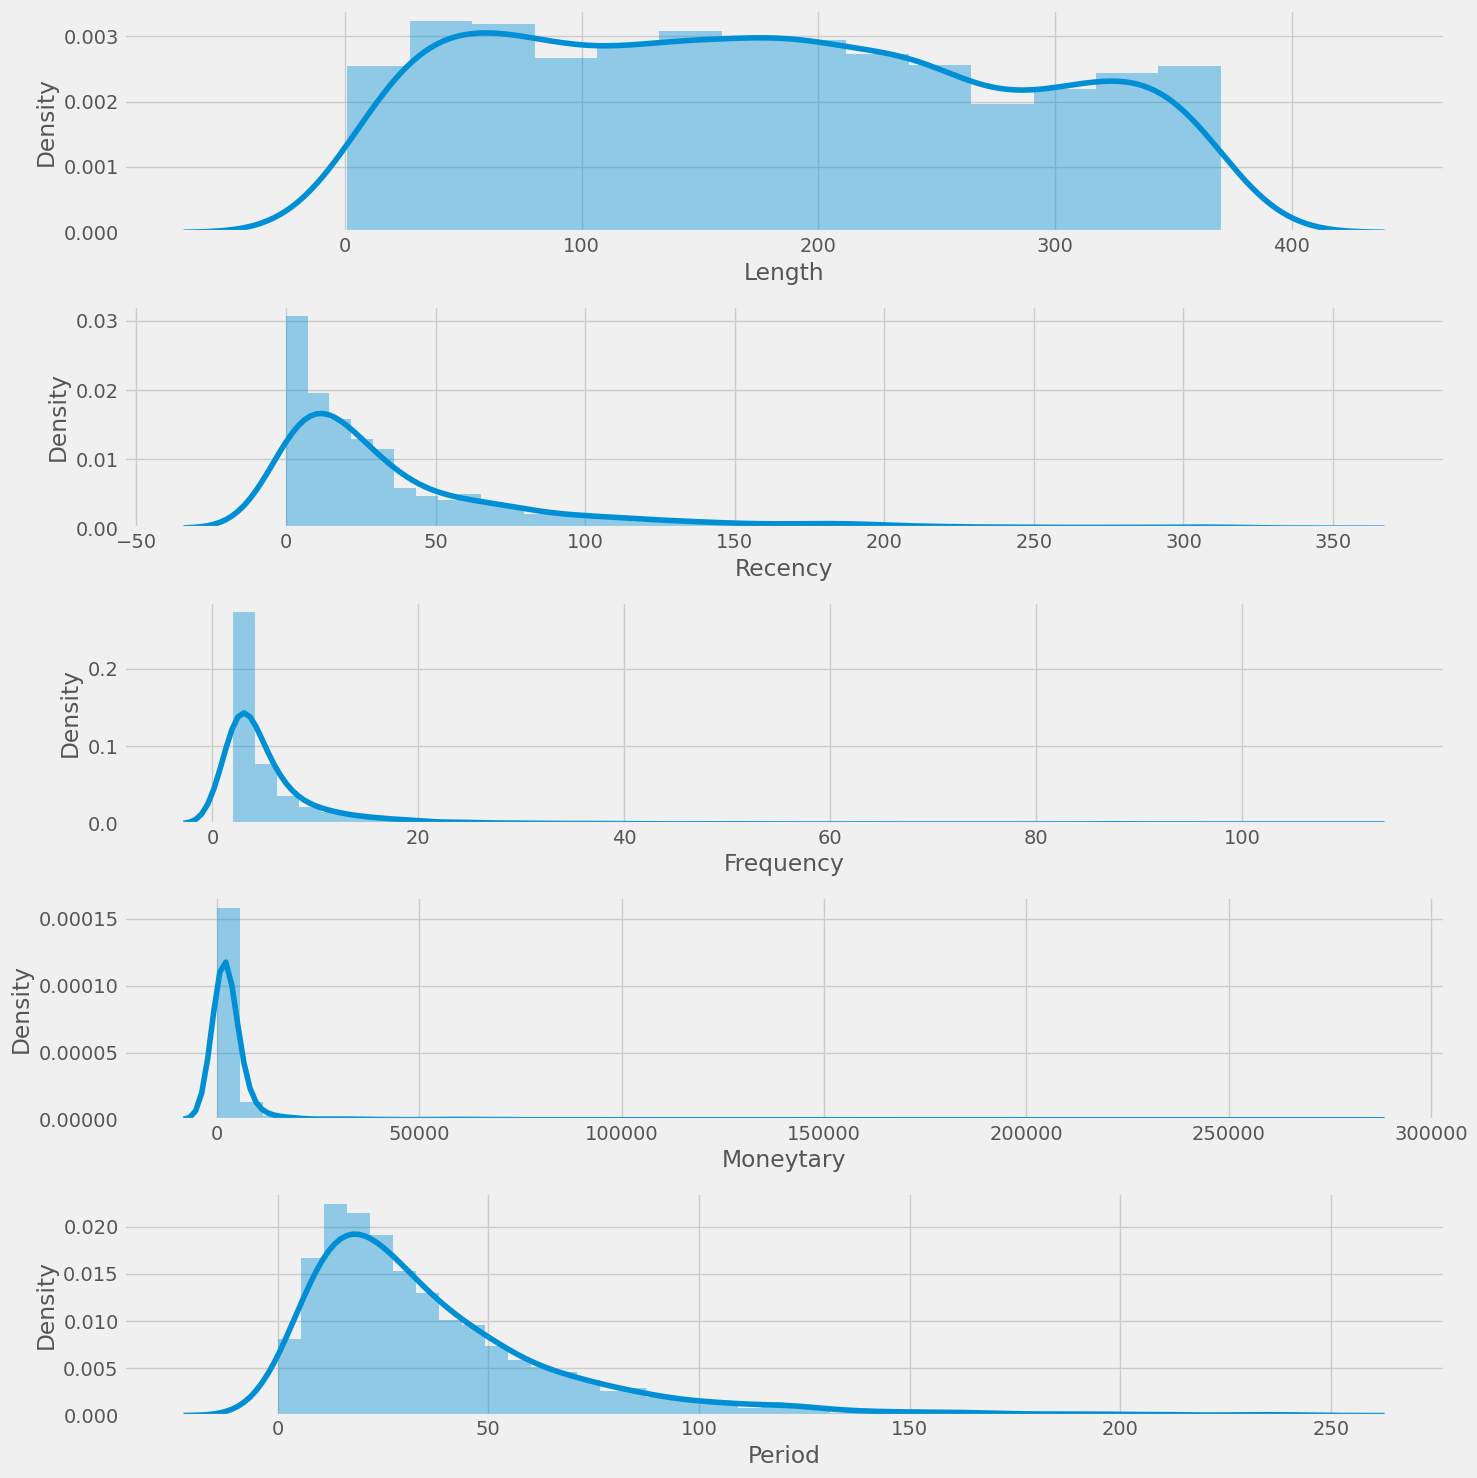

In [211]:
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(5, 1, 1); sns.distplot(lrfmpTable.Length, label = 'Length')
plt.subplot(5, 1, 2); sns.distplot(lrfmpTable.Recency, label = 'Recency')
plt.subplot(5, 1, 3); sns.distplot(lrfmpTable.Frequency, label = 'Frequency')
plt.subplot(5, 1, 4); sns.distplot(lrfmpTable.Moneytary, label = 'Monetary')
plt.subplot(5, 1, 5); sns.distplot(lrfmpTable.Period, label = 'Period')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [218]:
df_lrfmp_log = lrfmpTable[['CustomerID','Length','Recency','Frequency','Moneytary','Period']]

Length's: Skew: -1.4400497782646693, : SkewtestResult(statistic=-19.529328860704997, pvalue=6.18468645362863e-85)
Recency's: Skew: -0.2523298192797813, : SkewtestResult(statistic=-4.451315666161418, pvalue=8.53457758790074e-06)
Frequency's: Skew: 1.2207558361933037, : SkewtestResult(statistic=17.464057987594405, pvalue=2.6910649966696363e-68)
Moneytary's: Skew: 0.752179500767042, : SkewtestResult(statistic=12.071400184409663, pvalue=1.4956753941957064e-33)
Period's: Skew: -0.4219891486464373, : SkewtestResult(statistic=-7.26004667302153, pvalue=3.869567801850592e-13)


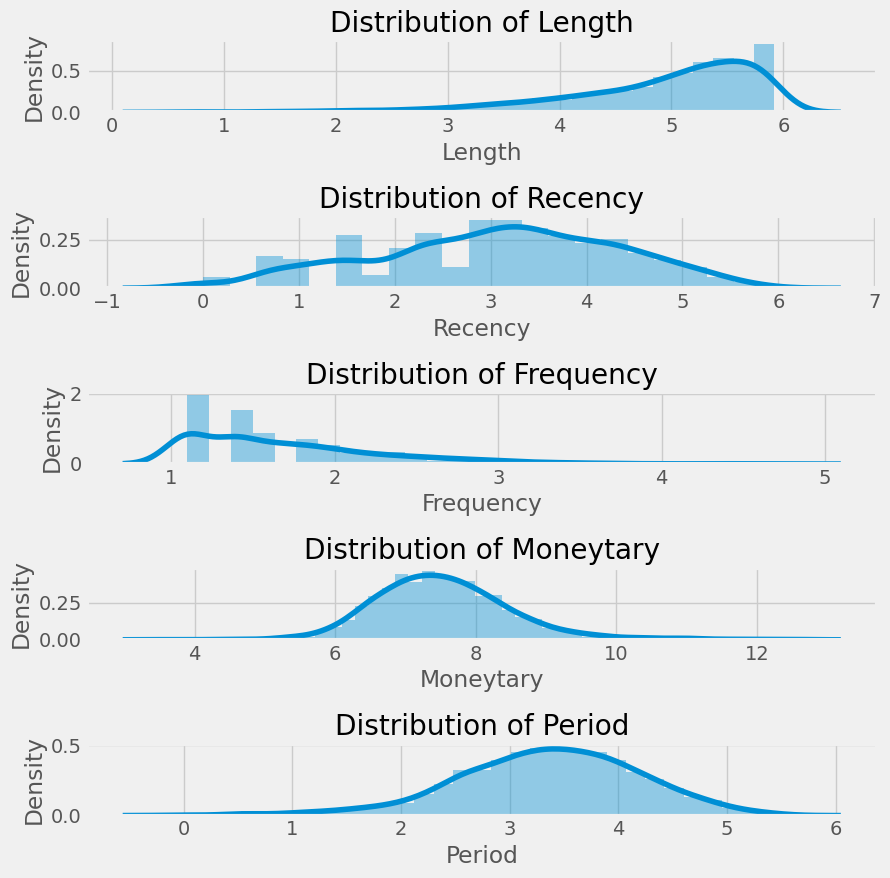

In [219]:
df_lrfmp_log = np.log(df_lrfmp_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(5, 1, 1)
check_skew(df_lrfmp_log,'Length')


plt.subplot(5, 1, 2)
check_skew(df_lrfmp_log,'Recency')

plt.subplot(5, 1, 3)
check_skew(df_lrfmp_log,'Frequency')
plt.subplot(5, 1, 4)
check_skew(df_lrfmp_log,'Moneytary')

plt.subplot(5, 1, 5)
check_skew(df_lrfmp_log,'Period')

plt.tight_layout()

In [225]:
scaler1 = StandardScaler()
lrfmp_normalized = scaler1.fit_transform(df_lrfmp_log)
lrfmp_normalized.shape

(1910, 6)

In [226]:
lrfmp_normalized

array([[-1.84418656,  0.95019066, -1.54304465,  0.39879814,  0.84587438,
        -0.45852814],
       [-1.84346856,  0.66382325,  1.00172139, -0.53869284, -0.04450118,
         1.07140669],
       [-1.84059716,  0.67735687,  0.43498462,  0.39879814,  0.29387921,
         1.04232676],
       ...,
       [ 1.6312279 , -0.39257948, -1.54304465, -1.02062947, -2.25582725,
         0.64983034],
       [ 1.63607838,  0.95368983, -1.31654213,  1.55998631,  0.11146917,
        -0.51146299],
       [ 1.63801783, -2.35361395,  0.55330724, -1.02062947, -0.0220759 ,
         1.35945114]])

In [227]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(lrfmp_normalized)
    inertia.append(km.inertia_)
inertia

[11460.0,
 8353.594492589258,
 7109.120036686401,
 6215.892092320797,
 5612.474063468906,
 5231.195021216188,
 4959.381403000489]

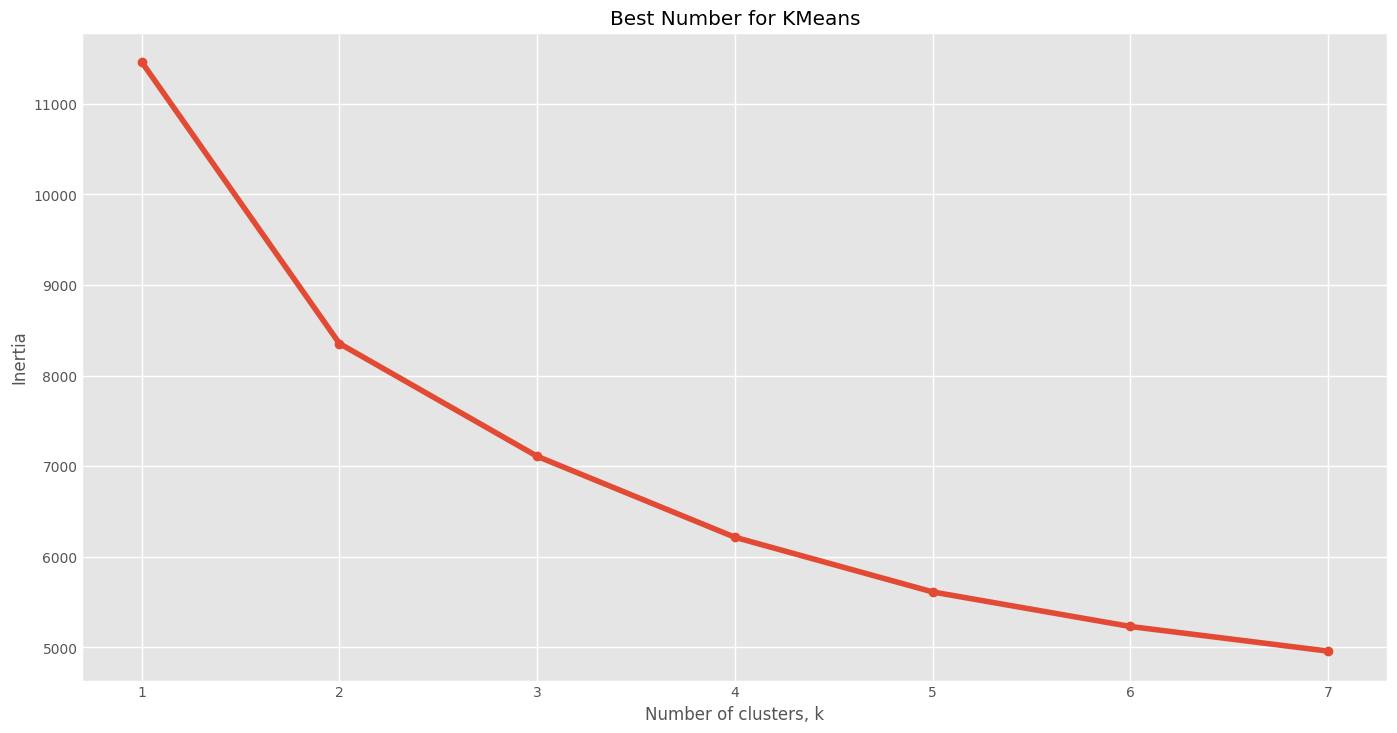

In [228]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(lrfmp_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [229]:
# find the optimum number of clusters (k) using the Silhouette method
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(lrfmp_normalized)
    clusters = kmeans.predict(lrfmp_normalized)
    silhouette_avg = silhouette_score(lrfmp_normalized, clusters)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.24578355608453614
For n_clusters = 3 The average silhouette_score is : 0.2097485244786563
For n_clusters = 4 The average silhouette_score is : 0.1987398290169442
For n_clusters = 5 The average silhouette_score is : 0.19002041749167145
For n_clusters = 6 The average silhouette_score is : 0.1898773541824117
For n_clusters = 7 The average silhouette_score is : 0.17576744220118173


K = 4 là tối ưu nhất

In [230]:
# clustering
kc = KMeans(n_clusters=4,random_state=1)
kc.fit(lrfmp_normalized)

KMeans(n_clusters=4, random_state=1)

In [231]:
# Assign the clusters to datamart
lrfmpTable['K_Cluster'] = kc.labels_
lrfmpTable.head()

,CustomerID,Length,Recency,Frequency,Moneytary,Period,K_Cluster
0,12347.0,315,2,6,4310.00,18.478817,2
1,12348.0,243,75,3,1797.24,70.149840,3
2,12352.0,246,36,6,2506.04,68.419296,3
3,12356.0,222,22,2,2811.43,100.409163,3
4,12359.0,247,57,3,6372.58,56.929781,3


In [232]:
lrfmpTable.reset_index(inplace = True)
lrfmpTable.head()

,index,CustomerID,Length,Recency,Frequency,Moneytary,Period,K_Cluster
0,0,12347.0,315,2,6,4310.00,18.478817,2
1,1,12348.0,243,75,3,1797.24,70.149840,3
2,2,12352.0,246,36,6,2506.04,68.419296,3
3,3,12356.0,222,22,2,2811.43,100.409163,3
4,4,12359.0,247,57,3,6372.58,56.929781,3


In [233]:
def kmeans(normalised_df, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

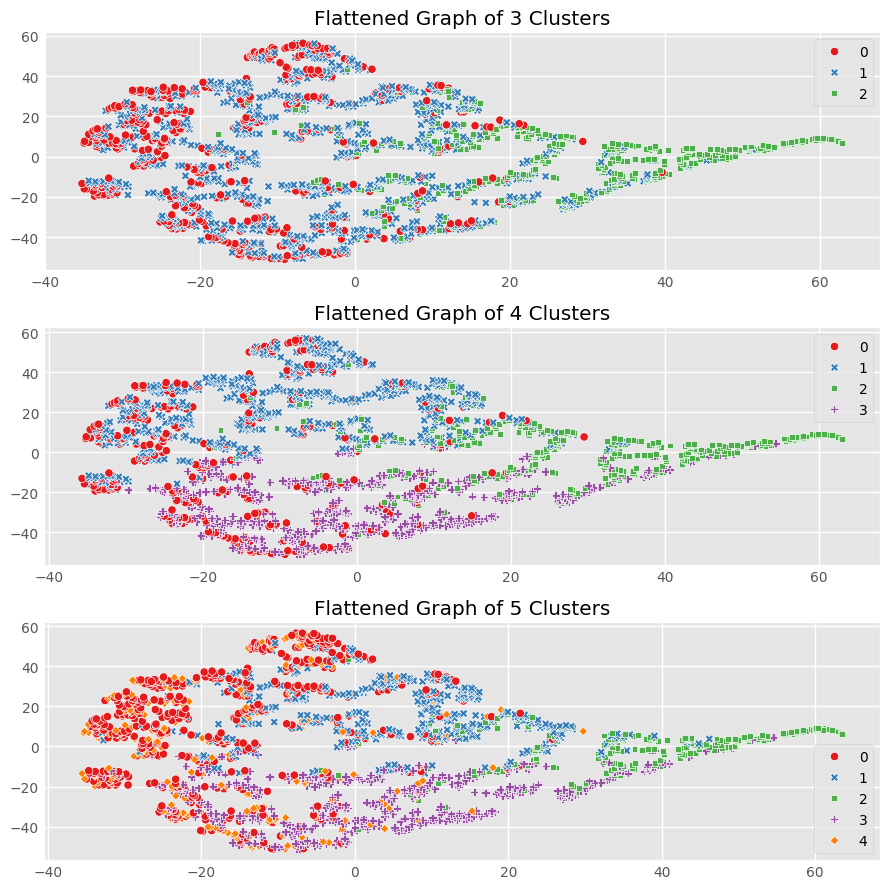

In [234]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_lrfmp_k3 = kmeans(lrfmp_normalized, 3, lrfmpTable[['CustomerID','Length','Recency','Frequency','Moneytary','Period']])

plt.subplot(3, 1, 2)
df_lrfmp_k4 = kmeans(lrfmp_normalized, 4, lrfmpTable[['CustomerID','Length','Recency','Frequency','Moneytary','Period']])

plt.subplot(3, 1, 3)
df_lrfmp_k5 = kmeans(lrfmp_normalized, 5, lrfmpTable[['CustomerID','Length','Recency','Frequency','Moneytary','Period']])

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)